In [1]:
# Load Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 

# Data Cleaning and Analysis

In [2]:
# Load the dataset 
dat = pd.read_csv("./dataset/dataset.csv", sep=',', decimal='.')
dat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,split
0,56.0,1.0,2.0,126.0,166.0,0.0,1.0,140.0,0.0,0.0,NaN,NaN,NaN,0,val
1,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,0,train
2,57.0,1.0,2.0,180.0,285.0,1.0,1.0,120.0,0.0,0.8,NaN,NaN,NaN,1,train
3,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,2.0,NaN,NaN,0,train
4,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,1,train


El data set consta de:
- 866 registros
- 14 variables y una columna con si la muestra corresponde al set de entrenamiento o al de validación

In [3]:
test_real = pd.read_csv('./dataset_real/test_real.csv', sep=';', decimal=',')
test_real.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,HOSPITAL
0,56,1,2,124.0,224.0,1.0,0.0,161,0,2.0,2.0,NaN,NaN,0,long-beach-va
1,61,1,4,125.0,0.0,0.0,0.0,105,1,0.0,3.0,NaN,7.0,3,suiza
2,52,1,4,135.0,0.0,NaN,0.0,128,1,2.0,2.0,NaN,7.0,2,suiza
3,64,1,4,120.0,0.0,1.0,1.0,106,0,2.0,2.0,NaN,NaN,1,long-beach-va
4,49,1,1,130.0,0.0,0.0,1.0,145,0,3.0,2.0,NaN,NaN,2,long-beach-va


## Tipo de variables

Utilizamos el describe para obtener información de cada tipo de variable.

In [4]:
dat.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
label         int64
split        object
dtype: object

Aunque muchas aparecen como float64, las variables se pueden clasificar en numéricas y categóricas según la siguiente lista:

Variables categóricas:

- sex (sexo del paciente)
- cp (tipo de dolor de pecho)
- fbs (dolor provocado por el esfuerzo)
- restecg (resultados electrocardiográficos en reposo)
- exang (angina inducida por el ejercicio)
- slope (la pendiente del segmento ST en ejercicio máximo)
- ca (número de vasos mayores coloreados por flouroscopia)
- thal (tipo de defecto)
- label (variable de clasificación, no mencionada en la lista inicial)
- split (variable de división de datos, no mencionada en la lista inicial)


Variables numéricas:

- age (edad del paciente)
- trestbps (presión arterial en reposo)
- chol (colesterol sérico)
- thalach (frecuencia cardiaca en reposo)
- oldpeak (depresión del ST inducida por el ejercicio en relación con el reposo)

In [5]:
numerical = ['age','trestbps','chol','thalach','oldpeak']

categorical = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

Convertimos las varaibles categoricas en el dataframe de test a float

In [6]:
for column in categorical:
    test_real[column] = test_real[column].astype(float)

test_real.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,HOSPITAL
0,56,1.0,2.0,124.0,224.0,1.0,0.0,161,0.0,2.0,2.0,NaN,NaN,0,long-beach-va
1,61,1.0,4.0,125.0,0.0,0.0,0.0,105,1.0,0.0,3.0,NaN,7.0,3,suiza
2,52,1.0,4.0,135.0,0.0,NaN,0.0,128,1.0,2.0,2.0,NaN,7.0,2,suiza
3,64,1.0,4.0,120.0,0.0,1.0,1.0,106,0.0,2.0,2.0,NaN,NaN,1,long-beach-va
4,49,1.0,1.0,130.0,0.0,0.0,1.0,145,0.0,3.0,2.0,NaN,NaN,2,long-beach-va


### Descprición estadística

Hacemos el describe para ver  información estadística de cada variable

In [7]:
dat.describe(include='number')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
count,866.000000,866.000000,866.000000,809.000000,840.00000,784.000000,865.000000,811.000000,811.000000,806.000000,570.000000,297.000000,413.000000,866.000000
mean,53.436490,0.788684,3.254042,132.092707,199.42381,0.159439,0.603468,137.692972,0.385943,0.846650,1.761404,0.703704,5.050847,1.085450
std,9.471283,0.408478,0.919984,19.129122,109.65967,0.366318,0.805788,26.156664,0.487118,1.071277,0.618336,1.049334,1.925766,1.232356
min,28.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,176.75000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.00000,0.000000,0.000000,140.000000,0.000000,0.450000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.25000,0.000000,1.000000,158.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.00000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,9.000000,7.000000,4.000000


Agrupamos por tipo de enfermedad

In [8]:
print(dat.groupby('label').describe(include='number'))

# print the previous line for column restecg


# give me column mean of dat.groupby('label').describe(include='number')

# dat.groupby('label').describe(include='number').loc[:, (slice(None), 'mean')] 


# give me the moda of column restecg


         age                                                       sex   
       count       mean       std   min   25%   50%   75%   max  count   
label                                                                    
0      399.0  50.511278  9.472215  28.0  43.0  51.0  57.0  76.0  399.0  \
1      185.0  54.351351  9.267217  31.0  48.0  56.0  61.0  75.0  185.0   
2      124.0  56.104839  8.365452  32.0  52.0  57.0  62.0  74.0  124.0   
3      125.0  58.160000  7.851854  40.0  53.0  58.0  64.0  77.0  125.0   
4       33.0  55.757576  8.681987  38.0  50.0  56.0  62.0  77.0   33.0   

                 ...   ca        thal                                           
           mean  ...  75%  max  count      mean       std  min  25%  50%  75%   
label            ...                                                            
0      0.651629  ...  0.0  9.0  182.0  3.983516  1.683443  3.0  3.0  3.0  6.0  \
1      0.881081  ...  1.0  3.0   97.0  5.701031  1.797944  3.0  3.0  7.0  7.0   
2 

### Missing values

In [9]:
# Count the number of missing values in each column

dat.isnull().sum()

age           0
sex           0
cp            0
trestbps     57
chol         26
fbs          82
restecg       1
thalach      55
exang        55
oldpeak      60
slope       296
ca          569
thal        453
label         0
split         0
dtype: int64

In [10]:
# Give me the missing values in the dataset by column split by label and add the total number of values per label in the end

# group by label and apply the isnull().sum() and size() functions
null_counts = dat.groupby('label').apply(lambda x: x.isnull().sum())
total_counts = dat.groupby('label').size().rename('total')

# concatenate the two DataFrames
result = pd.concat([null_counts, total_counts], axis=1)

print(result)


       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak   
label                                                                        
0        0    0   0        20    17   14        0       20     20       21  \
1        0    0   0        13     1   36        1       13     13       14   
2        0    0   0         8     5   19        0        7      7        8   
3        0    0   0        14     3   12        0       13     13       15   
4        0    0   0         2     0    1        0        2      2        2   

       slope   ca  thal  label  split  total  
label                                         
0        189  238   217      0      0    399  
1         47  128    88      0      0    185  
2         29   92    65      0      0    124  
3         27   90    66      0      0    125  
4          4   21    17      0      0     33  


In [11]:
import pandas as pd

# Give me the missing values in the dataset by column split by label and add the total number of values per label in the end

# group by label and apply the isnull().sum() and size() functions
null_counts = dat.groupby('label').apply(lambda x: x.isnull().sum())
total_counts = dat.groupby('label').size().rename('total')

# divide each value in null_counts by the corresponding value in total_counts, and multiply by 100 to get a percentage
result = null_counts.div(total_counts, axis=0).multiply(100)

# concatenate the two DataFrames
result = pd.concat([result, total_counts], axis=1)

print(result)


       age  sex   cp   trestbps      chol        fbs   restecg    thalach   
label                                                                       
0      0.0  0.0  0.0   5.012531  4.260652   3.508772  0.000000   5.012531  \
1      0.0  0.0  0.0   7.027027  0.540541  19.459459  0.540541   7.027027   
2      0.0  0.0  0.0   6.451613  4.032258  15.322581  0.000000   5.645161   
3      0.0  0.0  0.0  11.200000  2.400000   9.600000  0.000000  10.400000   
4      0.0  0.0  0.0   6.060606  0.000000   3.030303  0.000000   6.060606   

           exang    oldpeak      slope         ca       thal  label  split   
label                                                                        
0       5.012531   5.263158  47.368421  59.649123  54.385965    0.0    0.0  \
1       7.027027   7.567568  25.405405  69.189189  47.567568    0.0    0.0   
2       5.645161   6.451613  23.387097  74.193548  52.419355    0.0    0.0   
3      10.400000  12.000000  21.600000  72.000000  52.800000    0.0   

ca la eliminamos porque tiene más del 50% de sus valores como NA para cada label

### Valores erróneos

Contar número de 0 en columnas numéricas

In [12]:
# Count the number of zeros in columns ['age','trestbps','chol','thalach','oldpeak']

dat[['age','trestbps','chol','thalach','oldpeak']].eq(0).sum()

age           0
trestbps      1
chol        159
thalach       0
oldpeak     355
dtype: int64

## Visualizaciones

### Scatter plot

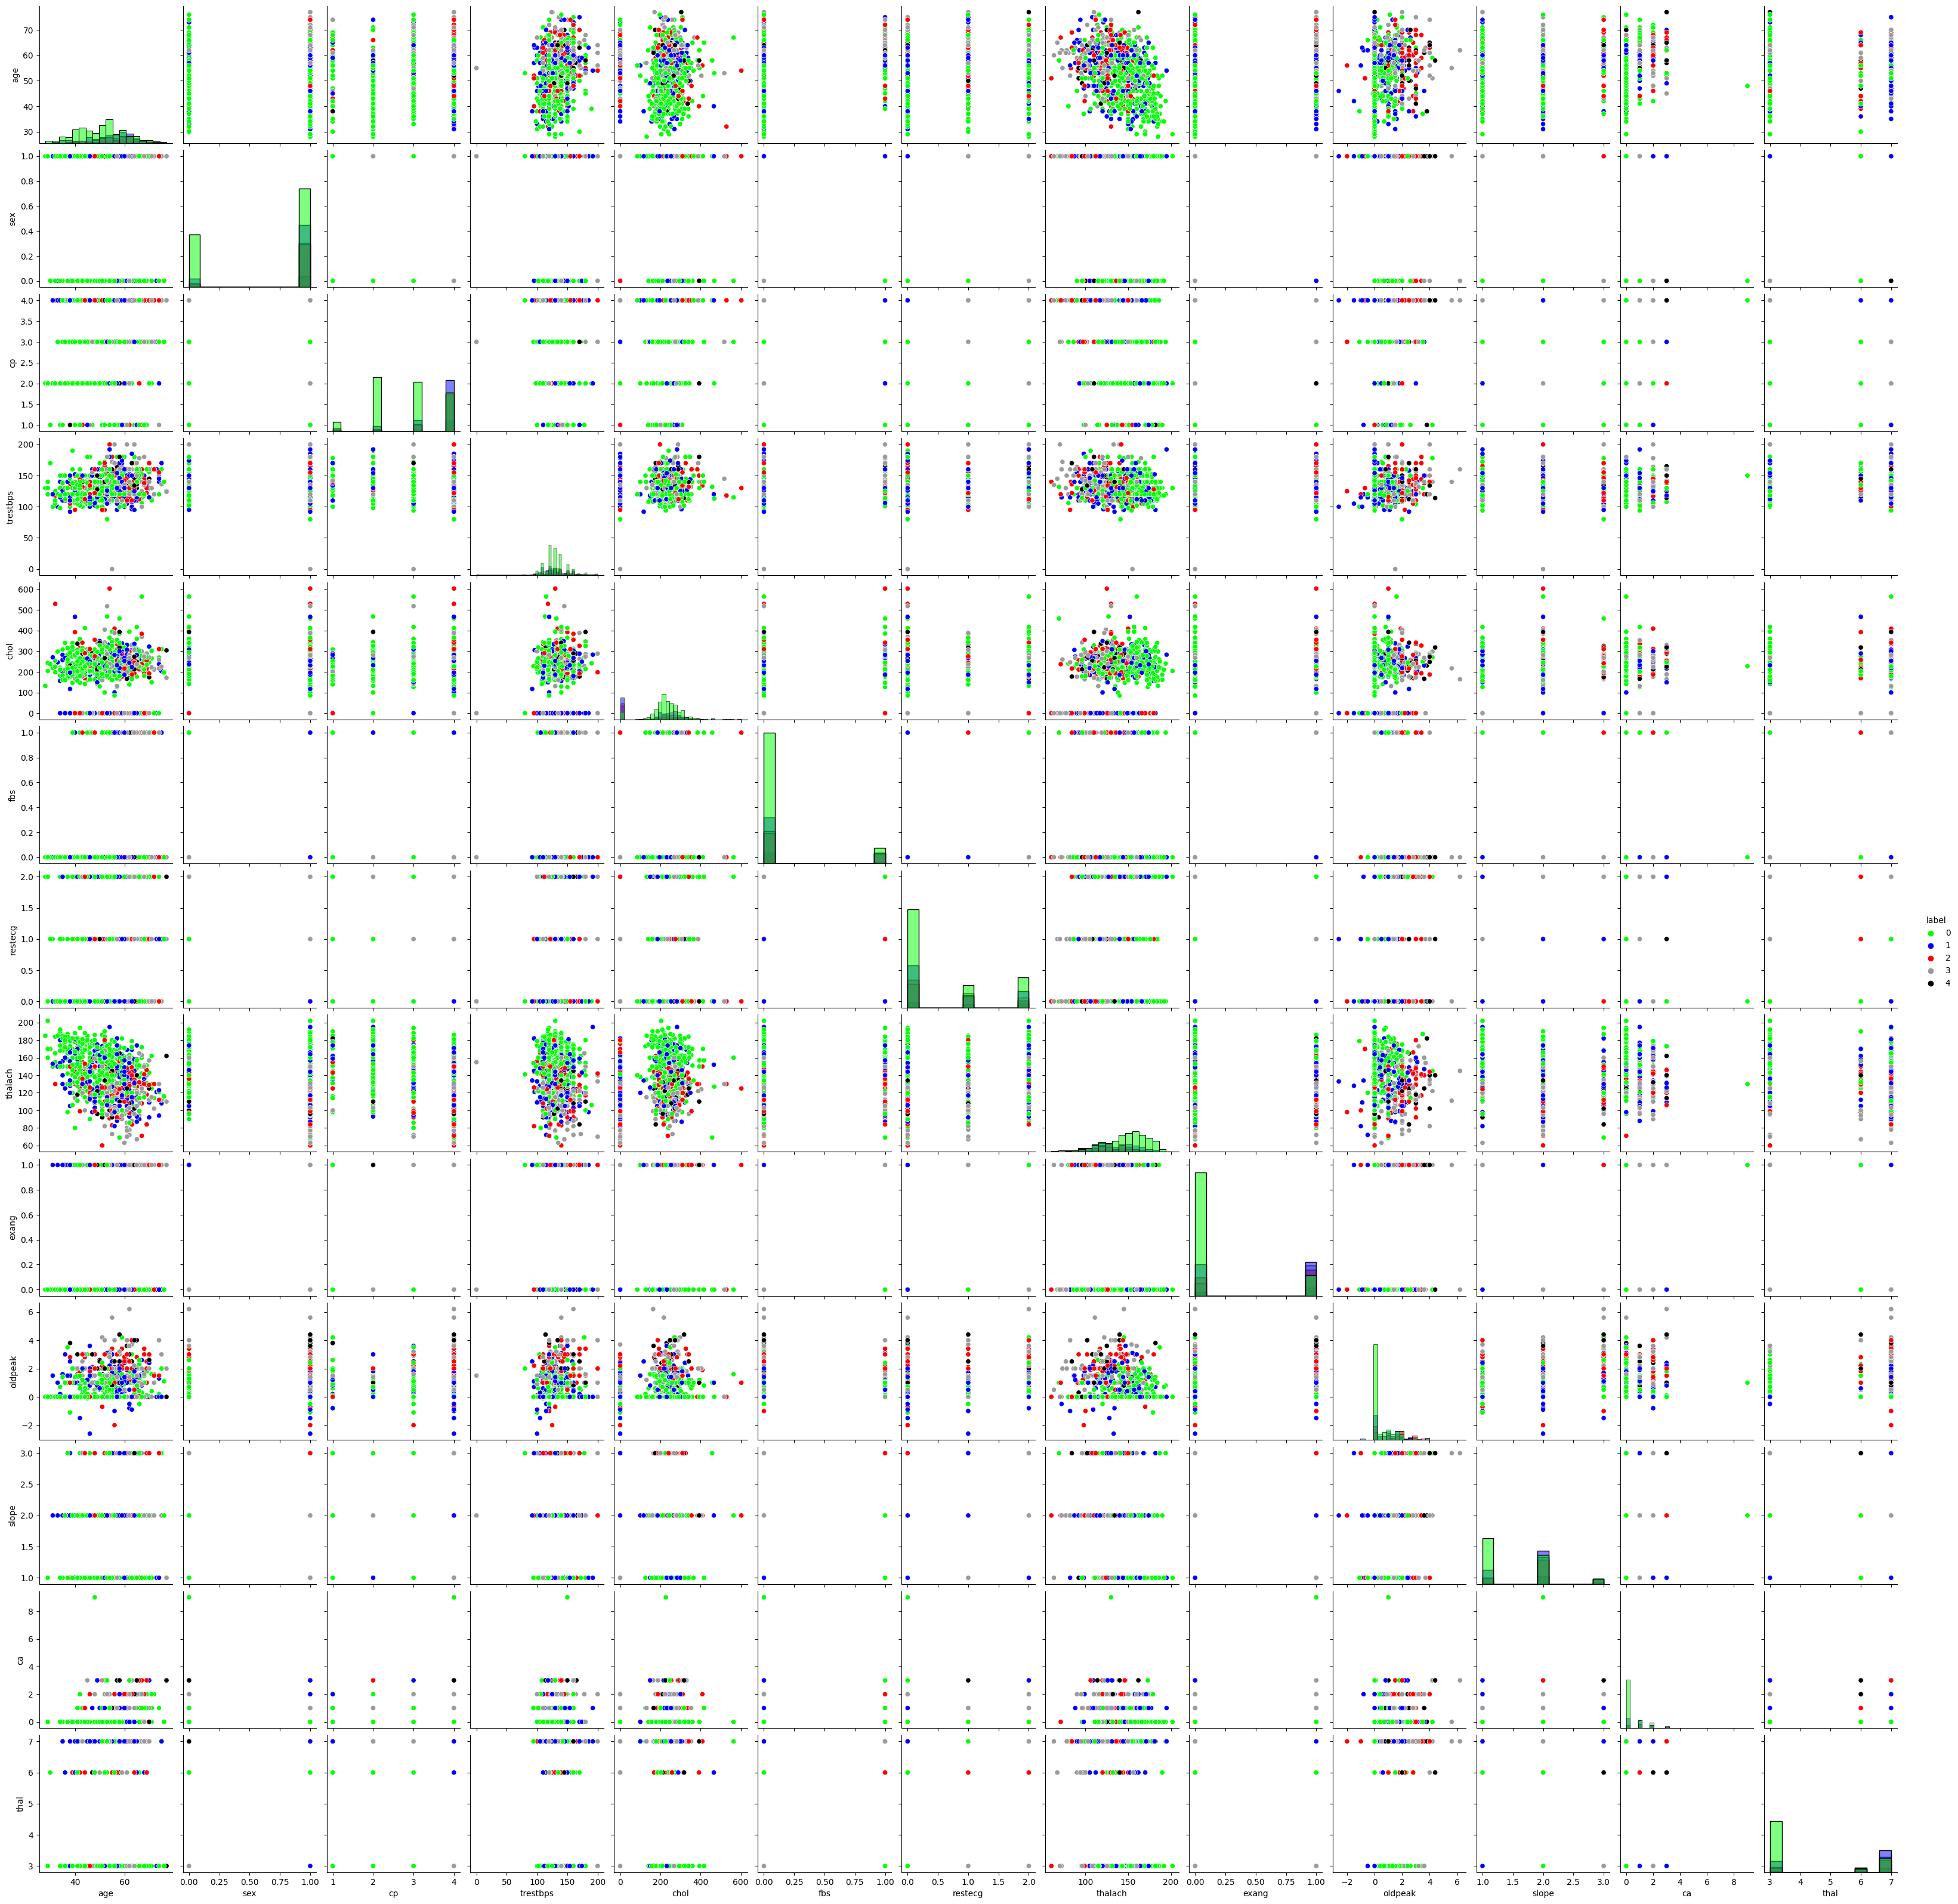

In [13]:
# Define una paleta de colores personalizada
mi_paleta = ["#00FF00", "#0000FF", "#FF0000","#9b9b9b","#000000"]

# Configura la paleta de colores de Seaborn
# sns.set_palette(mi_paleta)

sns.pairplot(dat, hue="label", diag_kind="hist", palette=mi_paleta)

# Plot the graph with the colours defined in mi_paleta


### Boxplot

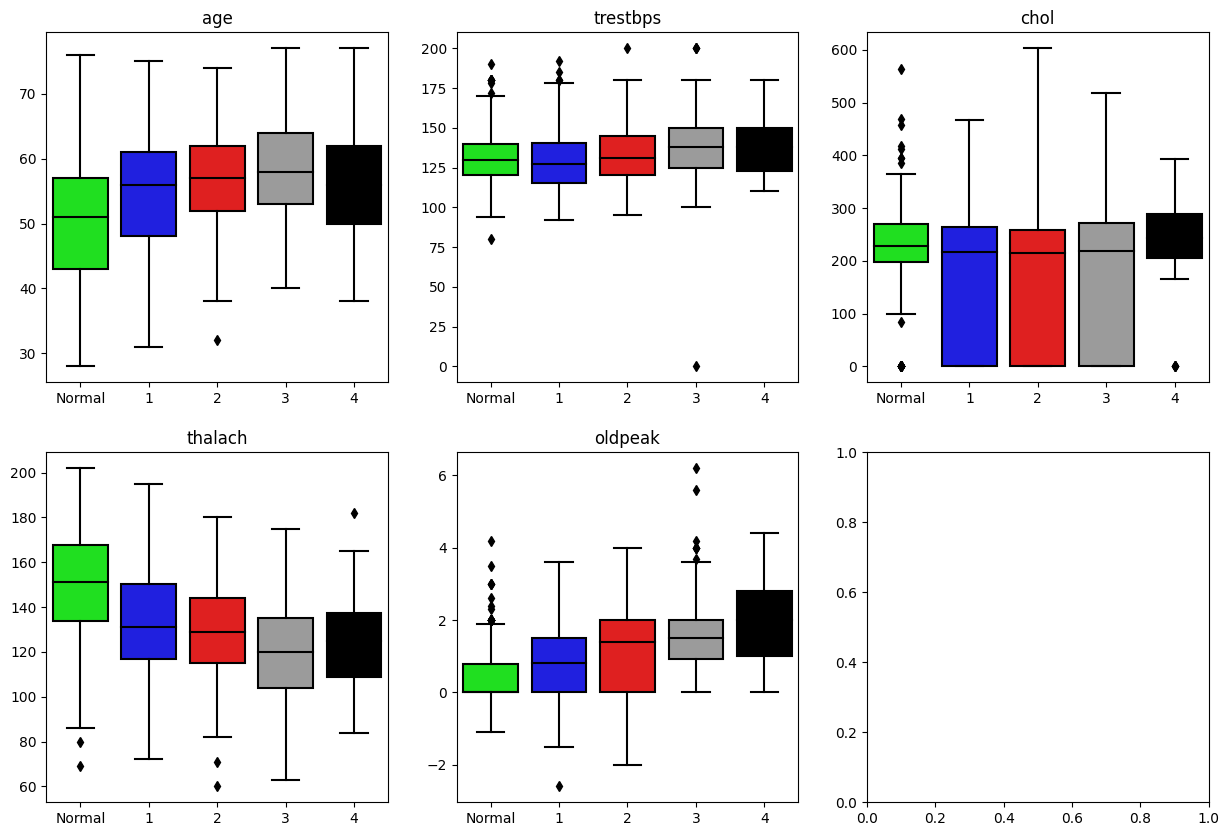

In [14]:
# Draw the box plot for the following variables ['age','trestbps','chol','thalach','oldpeak'] in a 2x3 grid

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Remove 0s in column chol by replacing them with NaN

# dat['chol'] = dat['chol'].replace(0, np.nan)

for i, var in enumerate(['age','trestbps','chol','thalach','oldpeak']):
    sns.boxplot(x="label", y=var, data=dat, palette=mi_paleta, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(var)
    axes[i//3, i%3].set_xlabel('')
    axes[i//3, i%3].set_ylabel('')
    axes[i//3, i%3].set_xticklabels(['Normal', '1', '2', '3', '4'])

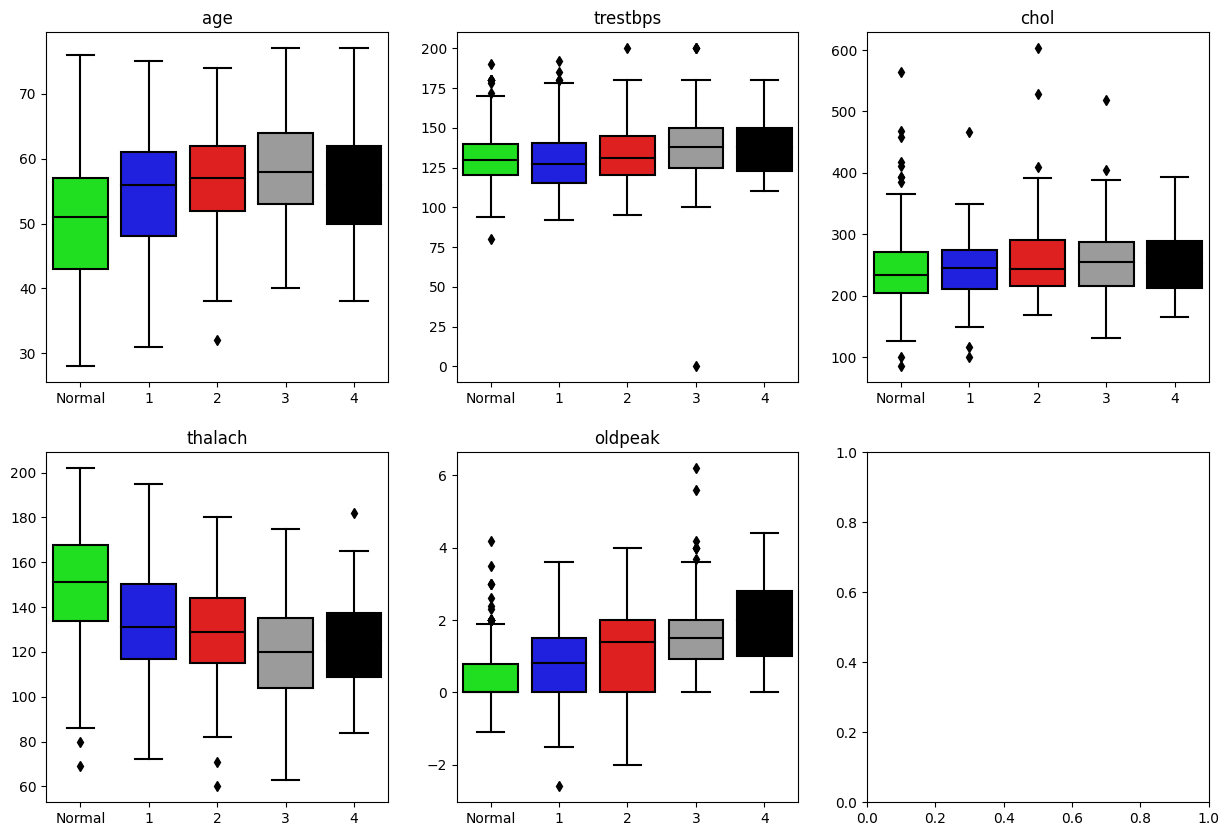

In [15]:
# Create a copy of dat in dat_col


# Draw the box plot for the following variables ['age','trestbps','chol','thalach','oldpeak'] in a 2x3 grid

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Remove 0s in column chol by replacing them with NaN

dat_col = dat.copy()

dat_col['chol'] = dat['chol'].replace(0, np.nan)


for i, var in enumerate(['age','trestbps','chol','thalach','oldpeak']):
    sns.boxplot(x="label", y=var, data=dat_col, palette=mi_paleta, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(var)
    axes[i//3, i%3].set_xlabel('')
    axes[i//3, i%3].set_ylabel('')
    axes[i//3, i%3].set_xticklabels(['Normal', '1', '2', '3', '4'])

La variable colesterol la vamos a descartar de momento, ya que hay un 20% de los valores que son 0, y no sabemos si es un error o no.

In [16]:
print(dat.groupby('label').describe(include='number').loc[:, (slice(None), 'mean')])

print(dat_col.groupby('label').describe(include='number').loc[:, (slice(None), 'mean')])

             age       sex        cp    trestbps        chol       fbs   
            mean      mean      mean        mean        mean      mean   
label                                                                    
0      50.511278  0.651629  2.774436  130.013193  227.782723  0.106494  \
1      54.351351  0.881081  3.578378  130.325581  169.130435  0.181208   
2      56.104839  0.919355  3.741935  134.163793  169.050420  0.238095   
3      58.160000  0.936000  3.696000  137.855856  178.844262  0.247788   
4      55.757576  0.878788  3.727273  138.935484  225.666667  0.125000   

        restecg     thalach     exang   oldpeak     slope        ca      thal  
           mean        mean      mean      mean      mean      mean      mean  
label                                                                          
0      0.551378  148.860158  0.142480  0.413757  1.485714  0.341615  3.983516  
1      0.630435  133.686047  0.517442  0.808187  1.818841  0.754386  5.701031  
2      

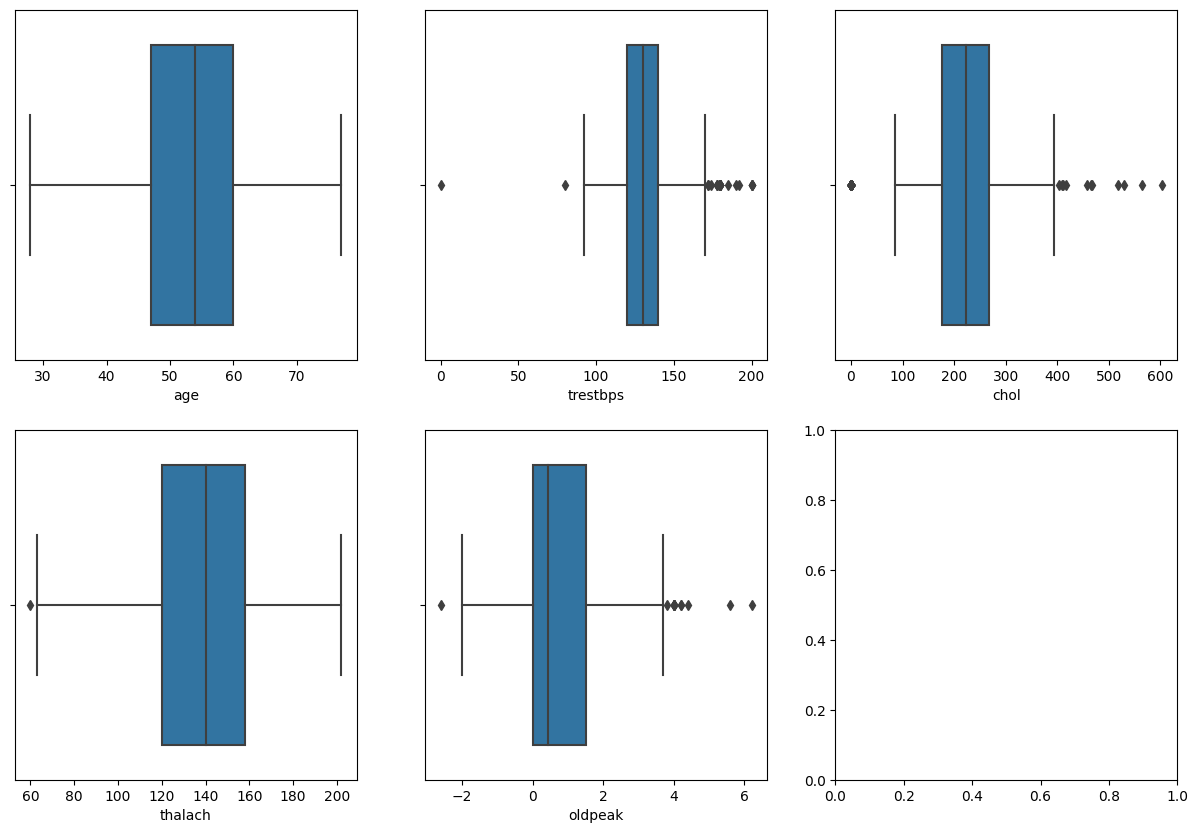

In [17]:
# Draw the box plot for the following variables ['age','trestbps','chol','thalach','oldpeak'] in a 2x3 grid without using the label column

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, var in enumerate(['age','trestbps','chol','thalach','oldpeak']):
    sns.boxplot(x=var, data=dat, ax=axes[i//3, i%3])

## Matriz Correlacion

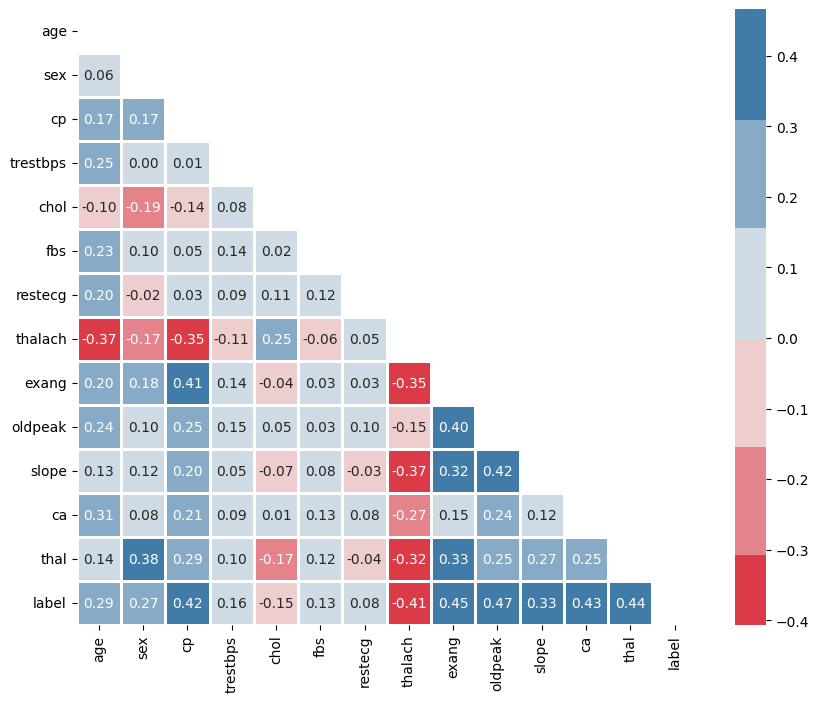

In [18]:
import numpy as np
import seaborn as sns

# Select only numeric columns
numeric_set = dat.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numeric_set.corr()

cmap = sns.diverging_palette(10, 240, n=6)

# Utilizamos la función np.ones_like() para crear una matriz de True values con las mismas dimensiones que nuestra matriz correlación.
# Luego le pasamos esto a Numpy triu() para que ponga a False todos los valores que no son del triángulo superior de la matriz
mask = np.triu(np.ones_like(corr, dtype=bool))
mask

# Le pasamos la matriz de booleanos y así nos podemos centrar en la parte del gráfico que nos interesa
# create the heatmap figure with desired size
plt.figure(figsize=(10,8))

# create the heatmap using sns.heatmap() as usual
sns.heatmap(numeric_set.corr(), mask=mask, center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f")

# show the heatmap
plt.show()

No hay correlación entre las variables

---------------------

# Preprocesado

## Missing values

#### Variables numéricas

Vamos a rellener primero los valores de todas las columnas excepto las más conflictivas que son 'ca' (gran número de missing values para todos los label (>70%)), 'chol' (gran cantidad de valores erróneos (valor = 0) para las label 1,2 y 3), 'slope' (muchos valores no informados para label 0) y 'thal' (gran cantidad de missing values para todas las label (50%))

Para las variables numéricas utilizamos la media de cada submuestra de la categoría label

In [19]:
# Store the mean of trestbps, fbs, restecg, thalach, exang, oldpeak, for each label in a list of dictionaries

# Create a list of dictionaries
means = []

# Group the dataframe by label column and calculate the mean of desired columns
grouped = dat.groupby('label')[['trestbps', 'thalach', 'oldpeak']].mean()

# Loop through each group and store the mean values in a dictionary
for label, data in grouped.iterrows():
    result = {'label': label,
              'trestbps_mean': data['trestbps'],
              'thalach_mean': data['thalach'],
              'oldpeak_mean': data['oldpeak']}
    means.append(result)

print(means)

[{'label': 0, 'trestbps_mean': 130.0131926121372, 'thalach_mean': 148.86015831134566, 'oldpeak_mean': 0.41375661375661377}, {'label': 1, 'trestbps_mean': 130.32558139534885, 'thalach_mean': 133.6860465116279, 'oldpeak_mean': 0.8081871345029239}, {'label': 2, 'trestbps_mean': 134.16379310344828, 'thalach_mean': 127.99145299145299, 'oldpeak_mean': 1.268103448275862}, {'label': 3, 'trestbps_mean': 137.85585585585585, 'thalach_mean': 119.74107142857143, 'oldpeak_mean': 1.6109090909090908}, {'label': 4, 'trestbps_mean': 138.93548387096774, 'thalach_mean': 124.87096774193549, 'oldpeak_mean': 2.0483870967741935}]


Aplicamos lo mismo para test

In [20]:
# Store the mean of trestbps, fbs, restecg, thalach, exang, oldpeak, for each label in a list of dictionaries

# Create a list of dictionaries
means = []

# Group the dataframe by label column and calculate the mean of desired columns
grouped = test_real.groupby('label')[['trestbps', 'thalach', 'oldpeak']].mean()

# Loop through each group and store the mean values in a dictionary
for label, test_reals in grouped.iterrows():
    result = {'label': label,
              'trestbps_mean': test_reals['trestbps'],
              'thalach_mean': test_reals['thalach'],
              'oldpeak_mean': test_reals['oldpeak']}
    means.append(result)

print(means)

[{'label': 0, 'trestbps_mean': 123.6, 'thalach_mean': 144.1, 'oldpeak_mean': 0.44000000000000006}, {'label': 1, 'trestbps_mean': 136.16666666666666, 'thalach_mean': 136.44444444444446, 'oldpeak_mean': 1.552941176470588}, {'label': 2, 'trestbps_mean': 134.66666666666666, 'thalach_mean': 130.66666666666666, 'oldpeak_mean': 1.5666666666666667}, {'label': 3, 'trestbps_mean': 130.83333333333334, 'thalach_mean': 130.0, 'oldpeak_mean': 0.9500000000000001}, {'label': 4, 'trestbps_mean': 139.8, 'thalach_mean': 127.33333333333333, 'oldpeak_mean': 2.5}]


Ahora rellenamos los missing values para cada label con la media de los valores de esa label según la lista de diccionarios means

In [21]:
dat_preproc = dat.copy()

# Define columns to impute
cols_to_impute = ['trestbps', 'thalach', 'oldpeak']

# Compute groupwise means for each column
medias = dat_preproc.groupby('label')[cols_to_impute].mean()

# Apply imputation for each column
for col in cols_to_impute:
    dat_preproc[col] = dat_preproc[col].fillna(dat_preproc['label'].map(medias[col]))

print(dat_preproc.isnull().sum())

age           0
sex           0
cp            0
trestbps      0
chol         26
fbs          82
restecg       1
thalach       0
exang        55
oldpeak       0
slope       296
ca          569
thal        453
label         0
split         0
dtype: int64


Aplicamos lo mismo para test

In [22]:
test_preproc = test_real.copy()

# Define columns to impute
cols_to_impute = ['trestbps', 'thalach', 'oldpeak']

# Compute groupwise means for each column
medias = test_preproc.groupby('label')[cols_to_impute].mean()

# Apply imputation for each column
for col in cols_to_impute:
    test_preproc[col] = test_preproc[col].fillna(test_preproc['label'].map(medias[col]))

print(test_preproc.isnull().sum())
print

age          0
sex          0
cp           0
trestbps     0
chol         4
fbs          7
restecg      1
thalach      0
exang        0
oldpeak      0
slope       12
ca          38
thal        30
label        0
HOSPITAL     0
dtype: int64


<function print>

#### Variables categóricas

Para las variables categóricas utilizamos la moda de cada submuestra de la categoría label

In [23]:
# Give me the most repeated value in columns 'fbs', 'restecg', 'exang'

# Define columns to impute
cols_to_impute = ['fbs', 'restecg', 'exang']

# Compute groupwise means for each column

modas = dat_preproc.groupby('label')[cols_to_impute].agg(lambda x: x.value_counts().index[0])

# Apply imputation for each column

for col in cols_to_impute:
    dat_preproc[col] = dat_preproc[col].fillna(dat_preproc['label'].map(modas[col]))

print(modas)

print(dat_preproc.isnull().sum())

       fbs  restecg  exang
label                     
0      0.0      0.0    0.0
1      0.0      0.0    1.0
2      0.0      0.0    1.0
3      0.0      0.0    1.0
4      0.0      0.0    1.0
age           0
sex           0
cp            0
trestbps      0
chol         26
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope       296
ca          569
thal        453
label         0
split         0
dtype: int64


Aplicamos lo mismo para test

In [24]:
# Give me the most repeated value in columns 'fbs', 'restecg', 'exang'

# Define columns to impute
cols_to_impute = ['fbs', 'restecg', 'exang']

# Compute groupwise means for each column

modas = test_preproc.groupby('label')[cols_to_impute].agg(lambda x: x.value_counts().index[0])

# Apply imputation for each column

for col in cols_to_impute:
    test_preproc[col] = test_preproc[col].fillna(test_preproc['label'].map(modas[col]))

print(modas)

print(test_preproc.isnull().sum())

       fbs  restecg  exang
label                     
0      0.0      0.0    0.0
1      0.0      0.0    0.0
2      0.0      2.0    1.0
3      0.0      0.0    1.0
4      0.0      2.0    0.0
age          0
sex          0
cp           0
trestbps     0
chol         4
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope       12
ca          38
thal        30
label        0
HOSPITAL     0
dtype: int64


## Escalado

Dentro del escalado existen 2 opciones para escalar las variables numéricas: tipificar a media 0 y std 1 o hacer un min-max entre 0 y 1. En este caso vamos a escalar a media 0 y std 1.

In [25]:
from sklearn.preprocessing import scale, MinMaxScaler

def scale_fun(X, numerical_variables, method = 'tipify'):
    dat_scaled = X.copy()
    if method == 'tipify':
        dat_scaled[numerical_variables] = pd.DataFrame(scale(X[numerical_variables]))
        
    elif method == 'min-max':
        # 3) Define
        scaler = MinMaxScaler()
        
        # 4) Train
        scaler.fit(dat[numerical_variables])
        
        # 5) Predict/Transform
        dat_scaled[numerical_variables] = pd.DataFrame(scaler.transform(X[numerical_variables]))
        
    return dat_scaled

dat_scaled = scale_fun(dat_preproc, 
                       numerical_variables = numerical,
                      method = 'tipify')
dat_scaled[numerical].apply([np.min, np.max, np.mean, np.std])

,age,trestbps,chol,thalach,oldpeak
amin,-2.687195e+00,-7.143100e+00,-1.819654e+00,-3.042669e+00,-3.315217e+00
amax,2.489328e+00,3.667800e+00,3.682453e+00,2.531336e+00,5.127682e+00
mean,9.025370e-17,-4.307563e-16,6.344132e-18,-2.502489e-16,-7.794637e-17
std,1.000578e+00,1.000578e+00,1.000596e+00,1.000578e+00,1.000578e+00


Aplicamos lo mismo para test

In [26]:
def scale_fun(X, numerical_variables, method = 'tipify'):
    test_scaled = X.copy()
    if method == 'tipify':
        test_scaled[numerical_variables] = pd.DataFrame(scale(X[numerical_variables]))
        
    elif method == 'min-max':
        # 3) Define
        scaler = MinMaxScaler()
        
        # 4) Train
        scaler.fit(test_real[numerical_variables])
        
        # 5) Predict/Transform
        test_scaled[numerical_variables] = pd.DataFrame(scaler.transform(X[numerical_variables]))
        
    return test_scaled

test_scaled = scale_fun(test_preproc, 
                       numerical_variables = numerical,
                      method = 'tipify')
test_scaled[numerical].apply([np.min, np.max, np.mean, np.std])

,age,trestbps,chol,thalach,oldpeak
amin,-2.565492e+00,-2.233368e+00,-1.502918e+00,-1.955262e+00,-1.095631e+00
amax,2.662399e+00,3.253929e+00,2.299154e+00,2.006261e+00,2.926336e+00
mean,3.375078e-16,2.220446e-16,6.275174e-17,1.243450e-16,2.042810e-16
std,1.010153e+00,1.010153e+00,1.011050e+00,1.010153e+00,1.010153e+00


### One hot encoding

In [27]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False)
ohe_fit = ohe.fit(dat_preproc[categorical])
X_ohe = pd.DataFrame(ohe.fit_transform(dat_preproc[categorical]))
X_ohe.columns = pd.DataFrame(ohe_fit.get_feature_names_out())
print(X_ohe)


     (sex_0.0,)  (sex_1.0,)  (cp_1.0,)  (cp_2.0,)  (cp_3.0,)  (cp_4.0,)   
0           0.0         1.0        0.0        1.0        0.0        0.0  \
1           0.0         1.0        0.0        0.0        1.0        0.0   
2           0.0         1.0        0.0        1.0        0.0        0.0   
3           0.0         1.0        0.0        0.0        1.0        0.0   
4           0.0         1.0        0.0        0.0        1.0        0.0   
..          ...         ...        ...        ...        ...        ...   
861         0.0         1.0        0.0        1.0        0.0        0.0   
862         0.0         1.0        0.0        0.0        0.0        1.0   
863         0.0         1.0        0.0        0.0        0.0        1.0   
864         1.0         0.0        0.0        0.0        0.0        1.0   
865         0.0         1.0        0.0        0.0        0.0        1.0   

     (fbs_0.0,)  (fbs_1.0,)  (restecg_0.0,)  (restecg_1.0,)  ...  (ca_0.0,)   
0           1.0     

/Users/mimove/Library/Python/3.10/lib/python/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/mimove/Library/Python/3.10/lib/python/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Aplicamos lo mismo para test.

In [28]:
ohe = OneHotEncoder(sparse = False)
ohe_fit = ohe.fit(test_preproc[categorical])
X_ohe_test = pd.DataFrame(ohe.fit_transform(test_preproc[categorical]))
X_ohe_test.columns = pd.DataFrame(ohe_fit.get_feature_names_out())
print(X_ohe)

     (sex_0.0,)  (sex_1.0,)  (cp_1.0,)  (cp_2.0,)  (cp_3.0,)  (cp_4.0,)   
0           0.0         1.0        0.0        1.0        0.0        0.0  \
1           0.0         1.0        0.0        0.0        1.0        0.0   
2           0.0         1.0        0.0        1.0        0.0        0.0   
3           0.0         1.0        0.0        0.0        1.0        0.0   
4           0.0         1.0        0.0        0.0        1.0        0.0   
..          ...         ...        ...        ...        ...        ...   
861         0.0         1.0        0.0        1.0        0.0        0.0   
862         0.0         1.0        0.0        0.0        0.0        1.0   
863         0.0         1.0        0.0        0.0        0.0        1.0   
864         1.0         0.0        0.0        0.0        0.0        1.0   
865         0.0         1.0        0.0        0.0        0.0        1.0   

     (fbs_0.0,)  (fbs_1.0,)  (restecg_0.0,)  (restecg_1.0,)  ...  (ca_0.0,)   
0           1.0     

/Users/mimove/Library/Python/3.10/lib/python/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/mimove/Library/Python/3.10/lib/python/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [29]:
X_ohe_reduced_test = X_ohe_test.copy()
column_prefix = 'ca_', 'thal_', 'slope_'
columns_to_drop = [col for col in X_ohe_reduced_test.columns if col[0].startswith(column_prefix) or col[0].startswith('thal_') or col[0].startswith('slope_')]
X_ohe_reduced_test = X_ohe_reduced_test.drop(columns=columns_to_drop)

In [30]:
# Assuming your DataFrame is named 'df'
new_columns = []
for column in X_ohe_reduced_test.columns:
    new_column = str(column).replace('(', '').replace(')', '').replace(',', '')
    new_columns.append(new_column)

# Update the column names in the DataFrame
X_ohe_reduced_test.columns=new_columns
print(X_ohe_reduced_test)

    'sex_0.0'  'sex_1.0'  'cp_1.0'  'cp_2.0'  'cp_3.0'  'cp_4.0'  'fbs_0.0'   
0         0.0        1.0       0.0       1.0       0.0       0.0        0.0  \
1         0.0        1.0       0.0       0.0       0.0       1.0        1.0   
2         0.0        1.0       0.0       0.0       0.0       1.0        1.0   
3         0.0        1.0       0.0       0.0       0.0       1.0        0.0   
4         0.0        1.0       1.0       0.0       0.0       0.0        1.0   
5         1.0        0.0       0.0       0.0       0.0       1.0        0.0   
6         1.0        0.0       0.0       0.0       0.0       1.0        1.0   
7         0.0        1.0       0.0       0.0       0.0       1.0        1.0   
8         0.0        1.0       0.0       0.0       0.0       1.0        0.0   
9         0.0        1.0       0.0       0.0       0.0       1.0        1.0   
10        1.0        0.0       0.0       0.0       0.0       1.0        1.0   
11        0.0        1.0       0.0       0.0       1

In [31]:
test_scaled_reduced = test_scaled.copy()
test_scaled_reduced = test_scaled_reduced.drop(['sex', 'cp', 'chol', 'fbs', 'restecg', 'exang', 'slope', 'ca','thal'], axis = 1)

In [32]:
test_concatenated = pd.concat([test_scaled_reduced, X_ohe_reduced_test], axis = 1)

### Oversampling y subsampling

#### Oversampling

En primer lugar, hacemos oversampling de la categória 4 de label, ya que es la que menos registros tiene (33 registros). Para ello, utilizamos la función SMOTE de la librería imblearn.

In [33]:
from imblearn.over_sampling import SMOTE
from multiprocessing import cpu_count

def oversampling(X, y, p, type_value = 'SMOTE', k = 5, random_state = 0, n_jobs = 1):    
    if type_value == 'SMOTE':
        sm = SMOTE(sampling_strategy = p,
           random_state = random_state,
           k_neighbors = k,
           n_jobs = n_jobs)
        X, y = sm.fit_resample(X, y)
        return X,y
    elif type_value == 'duplicates':
        majority_class = stats.mode(y)[0][0]
        oversampling_rows = pd.concat([pd.DataFrame(X[y == majority_class]), 
                                       pd.Series(y[y == majority_class])], 
                                      axis = 1).sample(frac = p, 
                                                                      replace = True, 
                                                                      random_state = random_state, 
                                                                      axis = 0)
        X = pd.concat([pd.concat([pd.DataFrame(X), pd.Series(y)], axis = 1), oversampling_rows]) 
        return X                                        

Creamos ahora un dataset con las columnas iniciales que vamos a estudiar

Primero seleccionamos las columnas de este dataframe en el cual tenemos las variables categóricas como thal, ca y slope para poder dropearlas, ya que tienen un porcentaje de missing values superior al 50% y en el segundo eliminaremos la columna de cholesterol ya que tienen muchos errores y finalmente realizaremos un concat de ambos dataframes.

In [34]:
X_ohe_reduced = X_ohe.copy()
column_prefix = 'ca_', 'thal_', 'slope_'
columns_to_drop = [col for col in X_ohe_reduced.columns if col[0].startswith(column_prefix) or col[0].startswith('thal_') or col[0].startswith('slope_')]
X_ohe_reduced = X_ohe_reduced.drop(columns=columns_to_drop)

In [35]:
# Assuming your DataFrame is named 'df'
new_columns = []
for column in X_ohe_reduced.columns:
    new_column = str(column).replace('(', '').replace(')', '').replace(',', '')
    new_columns.append(new_column)

# Update the column names in the DataFrame
X_ohe_reduced.columns=new_columns
print(X_ohe_reduced)

     'sex_0.0'  'sex_1.0'  'cp_1.0'  'cp_2.0'  'cp_3.0'  'cp_4.0'  'fbs_0.0'   
0          0.0        1.0       0.0       1.0       0.0       0.0        1.0  \
1          0.0        1.0       0.0       0.0       1.0       0.0        0.0   
2          0.0        1.0       0.0       1.0       0.0       0.0        0.0   
3          0.0        1.0       0.0       0.0       1.0       0.0        0.0   
4          0.0        1.0       0.0       0.0       1.0       0.0        1.0   
..         ...        ...       ...       ...       ...       ...        ...   
861        0.0        1.0       0.0       1.0       0.0       0.0        1.0   
862        0.0        1.0       0.0       0.0       0.0       1.0        1.0   
863        0.0        1.0       0.0       0.0       0.0       1.0        1.0   
864        1.0        0.0       0.0       0.0       0.0       1.0        1.0   
865        0.0        1.0       0.0       0.0       0.0       1.0        1.0   

     'fbs_1.0'  'restecg_0.0'  'restecg

In [36]:
dat_scaled_reduced = dat_scaled.copy()
dat_scaled_reduced = dat_scaled_reduced.drop(['sex', 'cp', 'chol', 'fbs', 'restecg', 'exang', 'slope', 'ca','thal'], axis = 1)

In [37]:
dat_concatened = pd.concat([dat_scaled_reduced, X_ohe_reduced], axis = 1)

In [38]:
X = dat_concatened.copy()
X["split"] = X["split"].replace({"train": 0, "val": 1})
X = X.drop(['label'], axis = 1)
Y = dat_concatened['label']
print(Y)

0      0
1      0
2      1
3      0
4      1
      ..
861    3
862    2
863    1
864    3
865    3
Name: label, Length: 866, dtype: int64


In [39]:
# Define the oversampling strategy for each class of column label

p = {0: 399, 1: 185, 2: 124, 3: 125, 4: 110}

In [40]:
from sklearn.model_selection import train_test_split
X_res, y_res = oversampling(X, Y, p, type_value = 'SMOTE', k = 5, random_state = 0, n_jobs = cpu_count()-1)
#X_train, X_val, y_train, y_val = train_test_split(X_res.iloc[866:], y_res.iloc[866:], test_size=0.2, random_state=0)
X_prueba=X_res.iloc[866:]
Y_prueba=y_res.iloc[866:]
percentages = X_prueba["split"].value_counts(normalize=True) * 100
print(percentages)
#print(X_res['label'])
print(y_res)

split
0    92.207792
1     7.792208
Name: proportion, dtype: float64
0      0
1      0
2      1
3      0
4      1
      ..
938    4
939    4
940    4
941    4
942    4
Name: label, Length: 943, dtype: int64


/Users/mimove/Library/Python/3.10/lib/python/site-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [41]:
'''
X_train['split'] = 'train'
X_val['split'] = 'val'
y_train = y_train.to_frame(name = 'label')
y_val = y_val.to_frame(name = 'label')
'''

"\nX_train['split'] = 'train'\nX_val['split'] = 'val'\ny_train = y_train.to_frame(name = 'label')\ny_val = y_val.to_frame(name = 'label')\n"

In [42]:
X_res['label'] = y_res

Ahora vamos a concatenar 

In [43]:
#df_merged = dat_concatened.join(X_train).join(X_val).join(y_train).join(y_val)

Dividimos los data set en train y test

In [44]:
# Split the dataset dat into train based on the value of column split
train = X_res[X_res['split'] == 0]
val = X_res[X_res['split'] == 1]
train = train.drop(['split'], axis = 1)
val = val.drop(['split'], axis = 1)
X_train = train.drop(['label'], axis = 1)
y_train = train['label']
X_val = val.drop(['label'], axis = 1)
y_val = val['label']


# Grid Search y Modelos

Vamos a proceder a realizar un grid search que compare todos los modelos de clasificación que hemos visto, es decir:

![grid_search](../DATAPROJECT3/grid_search.png)


Ahora pasaremos a importar todos los modelos que vamos a utilizar para clasificar el grado de enfermedad de nuestros pacientes.

In [45]:
from sklearn.linear_model import LinearRegression # Regresión lineal
from sklearn.linear_model import LogisticRegression # Regresión logística
from sklearn.svm import SVC #svm
from sklearn.tree import DecisionTreeClassifier # Arbol de decisión
from sklearn.ensemble import RandomForestClassifier # Random Forest
from xgboost import XGBClassifier # XGBoost

A continuación aparecen importadas las métricas que podrían tener una mejor performance en el caso de la clasificación de enfermedades cardiacas.

En función de los resultados se utilizarán determinadas métricas que nos permitan obtener el mejor modelo.

In [46]:
# Importar las bibliotecas necesarias
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
'''
# Ejemplo de predicciones y etiquetas reales
y_pred = np.array([0, 1, 1, 2, 2, 2])
y_true = np.array([0, 0, 1, 2, 2, 3])

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)
print("Matriz de confusión:\n", cm)

# Calcular la precisión, sensibilidad y F1-Score
print("\nInforme de clasificación:\n", classification_report(y_true, y_pred))

# Calcular el área bajo la curva ROC
auc_score = roc_auc_score(y_true, y_pred, multi_class='ovo')
print("\nÁrea bajo la curva ROC:", auc_score)
'''

'\n# Ejemplo de predicciones y etiquetas reales\ny_pred = np.array([0, 1, 1, 2, 2, 2])\ny_true = np.array([0, 0, 1, 2, 2, 3])\n\n# Calcular la matriz de confusión\ncm = confusion_matrix(y_true, y_pred)\nprint("Matriz de confusión:\n", cm)\n\n# Calcular la precisión, sensibilidad y F1-Score\nprint("\nInforme de clasificación:\n", classification_report(y_true, y_pred))\n\n# Calcular el área bajo la curva ROC\nauc_score = roc_auc_score(y_true, y_pred, multi_class=\'ovo\')\nprint("\nÁrea bajo la curva ROC:", auc_score)\n'

A continuación, definimos una serie de parámetros generales para nuestro modelo.

In [47]:
import multiprocessing
y_train = np.array(y_train).astype(int)
random_state = 1;
n_estimators = 10
nthread = multiprocessing.cpu_count() - 1;
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1);

Debido al uso de la SVM como modelo primero debemos de calcular los puntos recomendados por Cherkassky para la SVM.

In [48]:
n = X_train.shape[0];
d = X_train.shape[1];
m = np.mean(y_train);
s = np.std(y_train);
C_cherk = np.max([np.abs(m + 3*s),np.abs(m - 3*s)]);
gamma_cherk = np.power(0.2, 1/d)

Ahora pasaremos a definir el grid que llevaremos a cabo para los diferentes modelos que utilizaremos.

In [49]:
# Regresion Logística
regularization_values = ['l1', 'l2', 'none'];
penalty_values = [1, 10, 100];

# SVM
C_values = [C_cherk, 5e-03, 4.5e-03, 4e-03];
gamma_kernel_values = [gamma_cherk, 3.26e-09, 3.255e-09, 3.25e-09];

# Arbol de Decision
max_depth_values = [None, 6, 20];
min_samples_split_values = [2, 5, 20];
min_samples_leaf_values = [1, 5, 20];
max_features_values = [None, 1, 2];


# Random Forest
ntrees_values = [10, 50, 100]
max_depth_values = [10,  100, None]
min_samples_split_values = [2, 4, 12]
min_samples_leaf_values = [1, 2, 4]
max_features_values = [None, 0.01]

# Xgboost
nrounds_values = [2, 10]
eta_values = [0.3, 0.99]
gamma_values = [0, 1]
max_depth_values = [6, 20]
min_child_weight_values = [1, 20]
subsample_values = [0.1, 1]
colsample_bytree_values = [0.1, 1]
num_parallel_tree_values = [1, 20]
lambda_values = [0, 1]
alpha_values = [0, 1]

# LightGBM
# Aqui se definirán los parametros para el modelo de LightGBM.

A continuación, se definen los parámetros para cada modelo.

In [50]:
# Parámetros para los modelos

params_values = [{'model': 'logistic regression',
                  'regularization': regularization_values,
                 'penalty': penalty_values},
                 {'model': 'svm',
                  'C': C_values,
                 'gamma_kernel': gamma_kernel_values},
                 {'model': 'decision tree',
                 'max_depth': max_depth_values,
                 'min_samples_split': min_samples_split_values,
                 'min_samples_leaf': min_samples_leaf_values,
                 'max_features': max_features_values},
                 {'model': 'random forest',
                  'n_trees': ntrees_values,
                 'max_depth': max_depth_values,
                 'min_samples_split': min_samples_split_values,
                 'min_samples_leaf': min_samples_leaf_values,
                 'max_features': max_features_values},
                 {'model': 'xgboost',
                  'nrounds': nrounds_values,
                  'eta': eta_values,
                 'gamma': gamma_values,
                 'max_depth': max_depth_values,
                 'min_child_weight': min_child_weight_values,
                 'subsample': subsample_values,
                 'colsample_bytree': colsample_bytree_values,
                 'num_parallel_tree': num_parallel_tree_values,
                 'lambda': lambda_values,
                 'alpha': alpha_values}]
# Aquí faltan los parámetros para los modelos de LightGBM.

Ahora pasaremos a calcular el número de iteraciones que se van a realizar a lo largo del Grid Search.

In [51]:
total_iteraciones = 0
for params in params_values:
    if params['model'] == 'logistic regression':
        n = len(params['regularization'])*len(params['penalty'])
    elif params['model'] == 'svm':
        n = len(params['C'])*len(params['gamma_kernel'])
    elif params['model'] == 'decision tree':
        n = len(params['max_depth'])*len(params['min_samples_split'])*len(params['min_samples_leaf'])*len(params['max_features'])
    elif params['model'] == 'random forest':
        n = len(params['n_trees'])*len(params['max_depth'])*len(params['min_samples_split'])*len(params['min_samples_leaf'])*len(params['max_features'])
    elif params['model'] == 'xgboost':
        n = len(params['nrounds'])*len(params['eta'])*len(params['gamma'])*len(params['max_depth'])*len(params['min_child_weight'])*len(params['subsample'])*len(params['colsample_bytree'])*len(params['num_parallel_tree'])*len(params['lambda'])*len(params['alpha'])
    total_iteraciones = total_iteraciones + n;
    print(str(n)+ ' iteraciones de ' + str(params['model']))
print(str(total_iteraciones)+ ' iteraciones en total')   
# Aquí faltan las iteraciones para los modelos de LightGBM.

9 iteraciones de logistic regression
16 iteraciones de svm
36 iteraciones de decision tree
108 iteraciones de random forest
1024 iteraciones de xgboost
1193 iteraciones en total


Por último, pasaremos a ejecutar el grid search para los diferentes modelos que hemos definido previamente y con la métrica escogida.

Sin grid search:

In [52]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

from sklearn.metrics import f1_score as f1_scorer

y_pred = model.predict(X_val)
f1_score = f1_scorer(y_val, y_pred, average='weighted')
print(f1_score)

0.5007933829215176


In [53]:
# SVM:

from sklearn.svm import SVC
from sklearn.metrics import f1_score

params = params_values[1]
print(params)
# Initialize an SVM model with a 'rbf' kernel
model = SVC(kernel='rbf', C=params["C"][0], gamma=params["gamma_kernel"][0], random_state=random_state)

# Train the SVM model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_val)

# Compute the f1_score of the model
f1_score = f1_scorer(y_val, y_pred, average='micro')

print("F1 score:", f1_score)

{'model': 'svm', 'C': [5.692331398911268, 0.005, 0.0045, 0.004], 'gamma_kernel': [0.9096705132580012, 3.26e-09, 3.255e-09, 3.25e-09]}
F1 score: 0.5555555555555556


In [54]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

params = params_values[2]
model = DecisionTreeClassifier(max_depth=params["max_depth"][0],
                               min_samples_split=params["min_samples_split"][0],
                               min_samples_leaf=params["min_samples_leaf"][0],
                               max_features=params["max_features"][0], 
                               random_state=random_state)
model.fit(X_train, y_train)

from sklearn.metrics import f1_score as f1_scorer

y_pred = model.predict(X_val)
f1_score = f1_scorer(y_val, y_pred, average='micro')
print(f1_score)

0.5


In [55]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

params = params_values[3]
model = RandomForestClassifier(n_estimators = params["n_trees"][0],
                               max_depth=params["max_depth"][0],
                               min_samples_split=params["min_samples_split"][0],
                               min_samples_leaf=params["min_samples_leaf"][0],
                               max_features=params["max_features"][0], 
                               random_state=random_state)
model.fit(X_train, y_train)

from sklearn.metrics import f1_score as f1_scorer

y_pred = model.predict(X_val)
f1_score = f1_scorer(y_val, y_pred, average='micro')
print(f1_score)

0.5666666666666667


In [56]:
# XGBoost

import xgboost as xgb

params = params_values[4]
model = XGBClassifier(random_state = random_state,
                    n_estimators = params["nrounds"][0],
                    learning_rate = params["eta"][0], 
                    gamma = params["gamma"][0],
                    max_depth = params["max_depth"][0],
                    min_child_weight = params["min_child_weight"][0],
                    subsample = params["subsample"][0],
                    colsample_bytree = params["colsample_bytree"][0],
                    num_parallel_tree = params["num_parallel_tree"][0],
                    reg_lambda = params["lambda"][0],
                    reg_alpha = params["alpha"][0])
model.fit(X_train, y_train)

from sklearn.metrics import f1_score as f1_scorer

y_pred = model.predict(X_val)
f1_score = f1_scorer(y_val, y_pred, average='micro')
print(f1_score)

0.45


In [57]:
#LightGBM

import lightgbm as lgb
import timeit



X_train_lgb = X_train.copy()
X_val_lgb = X_val.copy()

y_train_lgb = y_train.copy()
y_val_lgb = y_val.copy()

X_train_lgb.columns = ["var_" + str(x) for x in range(X_train.shape[1])]
X_val_lgb.columns = ["var_" + str(x) for x in range(X_val.shape[1])]

train_data = lgb.Dataset(data = X_train_lgb, label = y_train_lgb)
validation_data = train_data.create_valid(data = X_val_lgb, label = y_val_lgb)


# set hyperparameters for lightGBM model
params_lgbm = {
    'objective': 'multiclass',
    'num_class': 5,
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'random_state': 42
}


start = timeit.default_timer()
model = lgb.train(params_lgbm, train_data, valid_sets=[train_data, validation_data], num_boost_round=1000, early_stopping_rounds=10)
time = timeit.default_timer() - start

pred_train_p = model.predict(X_train_lgb)
pred_val_p = model.predict(X_val_lgb)


# convert probabilities to predicted class labels
y_pred_labels_val = pred_val_p.argmax(axis=1)
y_pred_labels_train = pred_train_p.argmax(axis=1)


# Calcular métricas de evaluación
f1_score_train = f1_scorer(y_train_lgb, y_pred_labels_train, average='micro');
f1_score_val = f1_scorer(y_val_lgb, y_pred_labels_val, average='micro');

results = pd.DataFrame()
new_row = pd.DataFrame(data={'model':['LightGBM'],
                             'f1_score_train':[f1_score_train],
                             'f1_score_val':[f1_score_val], 
                             'time': [time]}, 
                             columns=['model',  'f1_score_train','f1_score_val', 'time'])
        
results_lgbm = pd.concat([results, new_row], ignore_index=True)

results_lgbm

[1]	training's multi_logloss: 1.42245	valid_1's multi_logloss: 1.41061
Training until validation scores don't improve for 10 rounds
[2]	training's multi_logloss: 1.37455	valid_1's multi_logloss: 1.38116
[3]	training's multi_logloss: 1.33201	valid_1's multi_logloss: 1.35968
[4]	training's multi_logloss: 1.29192	valid_1's multi_logloss: 1.34041
[5]	training's multi_logloss: 1.25353	valid_1's multi_logloss: 1.32265
[6]	training's multi_logloss: 1.21835	valid_1's multi_logloss: 1.29578
[7]	training's multi_logloss: 1.18476	valid_1's multi_logloss: 1.27462
[8]	training's multi_logloss: 1.1541	valid_1's multi_logloss: 1.25561
[9]	training's multi_logloss: 1.12475	valid_1's multi_logloss: 1.24046
[10]	training's multi_logloss: 1.09811	valid_1's multi_logloss: 1.2239
[11]	training's multi_logloss: 1.07271	valid_1's multi_logloss: 1.21107
[12]	training's multi_logloss: 1.04923	valid_1's multi_logloss: 1.19908
[13]	training's multi_logloss: 1.02757	valid_1's multi_logloss: 1.18899
[14]	training'

/usr/local/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[16]	training's multi_logloss: 0.967842	valid_1's multi_logloss: 1.16134
[17]	training's multi_logloss: 0.94998	valid_1's multi_logloss: 1.15331
[18]	training's multi_logloss: 0.931906	valid_1's multi_logloss: 1.14489
[19]	training's multi_logloss: 0.915055	valid_1's multi_logloss: 1.13663
[20]	training's multi_logloss: 0.897708	valid_1's multi_logloss: 1.1309
[21]	training's multi_logloss: 0.880372	valid_1's multi_logloss: 1.12732
[22]	training's multi_logloss: 0.865379	valid_1's multi_logloss: 1.12509
[23]	training's multi_logloss: 0.848945	valid_1's multi_logloss: 1.11776
[24]	training's multi_logloss: 0.833782	valid_1's multi_logloss: 1.11419
[25]	training's multi_logloss: 0.818617	valid_1's multi_logloss: 1.11301
[26]	training's multi_logloss: 0.805263	valid_1's multi_logloss: 1.10705
[27]	training's multi_logloss: 0.792439	valid_1's multi_logloss: 1.1041
[28]	training's multi_logloss: 0.778873	valid_1's multi_logloss: 1.10157
[29]	training's multi_logloss: 0.766687	valid_1's mult

,model,f1_score_train,f1_score_val,time
0,LightGBM,0.794233,0.566667,0.238814


Con grid search:

In [58]:
# Logistic Regression

import timeit
grid_results = pd.DataFrame();
num_iter = 0
params = params_values[0]
for regularization in params['regularization']:
    for penalty in params['penalty']:
        start = timeit.default_timer()

        # Actualizar contador
        num_iter += 1

        # print control iteracion modelo
        print('Inicio de iteracion ' + str(num_iter) +
                '. Regularizacion = ' + str(regularization) +
                ', Lambda = ' + str(penalty) +
                '\n')

        # Entrenar modelo
        if regularization == 'l1':
            model = LogisticRegression(penalty=regularization,
                                        solver='liblinear',
                                        C=penalty,
                                        random_state=random_state)
        else:
            model = LogisticRegression(penalty=regularization,
                                        solver='lbfgs',
                                        C=penalty,
                                        random_state=random_state)

        model.fit(X_train, np.array(y_train))

        # Generar predicciones
        pred_train = model.predict(X_train)
        pred_val = model.predict(X_val)

        # Calcular métricas de evaluación
        f1_train = f1_scorer(y_train, pred_train, average='micro')
        f1_val = f1_scorer(y_val, pred_val, average='micro')
        time = timeit.default_timer() - start

        print('Fin de iteracion ' + str(num_iter) +
                '. Regularizacion = ' + str(regularization) +
                ', Lambda = ' + str(penalty) +
                '. F1 train = ' + str(f1_train) +
                ' -  F1 val = ' + str(f1_val) +
                ' -  time = ' + str(time) +
                '\n')
        
        new_row = pd.DataFrame(data={'model': 'Logistic Regression',
                                                                'params': [{'regularization': [regularization],
                                                                            'penalty': [penalty]}],
                                                                'f1_train': [f1_train],
                                                                'f1_val': [f1_val],
                                                                'time': [time]},
                                                        columns=['model', 'params', 'f1_train', 'f1_val', 'time'])
        
        grid_results = pd.concat([grid_results, new_row], ignore_index=True)

Inicio de iteracion 1. Regularizacion = l1, Lambda = 1

Fin de iteracion 1. Regularizacion = l1, Lambda = 1. F1 train = 0.564875491480996 -  F1 val = 0.4888888888888889 -  time = 0.03105883504031226

Inicio de iteracion 2. Regularizacion = l1, Lambda = 10

Fin de iteracion 2. Regularizacion = l1, Lambda = 10. F1 train = 0.562254259501966 -  F1 val = 0.5111111111111111 -  time = 0.07283454498974606

Inicio de iteracion 3. Regularizacion = l1, Lambda = 100

Fin de iteracion 3. Regularizacion = l1, Lambda = 100. F1 train = 0.5609436435124509 -  F1 val = 0.5111111111111111 -  time = 0.19435064098797739

Inicio de iteracion 4. Regularizacion = l2, Lambda = 1

Fin de iteracion 4. Regularizacion = l2, Lambda = 1. F1 train = 0.5688073394495413 -  F1 val = 0.5055555555555555 -  time = 0.02489240001887083

Inicio de iteracion 5. Regularizacion = l2, Lambda = 10

Fin de iteracion 5. Regularizacion = l2, Lambda = 10. F1 train = 0.5701179554390564 -  F1 val = 0.49444444444444446 -  time = 0.0382126

/Users/mimove/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mimove/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/mimove/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `pe

In [59]:
# SVM:

import timeit
num_iter = 0
params = params_values[1]
for C in params['C']:
      for gamma_kernel in params['gamma_kernel']:  
            start = timeit.default_timer()
            
            # Actualizar contador
            num_iter += 1; 
            
            # print control iteracion modelo
            print('Inicio de iteracion ' + str(num_iter) + 
                  '. C = ' + str(C) + 
                  ', gamma = '  + str(gamma_kernel) +
                  '\n')
            
            # Entrenar modelo               
            model = SVC(kernel='rbf',
                        C = C, 
                        gamma = gamma_kernel, 
                        random_state = random_state)
            
            model.fit(X_train, y_train)

            # Generar predicciones
            pred_train = model.predict(X_train)
            pred_val = model.predict(X_val)

            # Calcular métricas de evaluación
            f1_train = f1_scorer(y_train, pred_train, average='micro')
            f1_val = f1_scorer(y_val, pred_val, average='micro')
            time = timeit.default_timer() - start

            print('Fin de iteracion ' + str(num_iter) + 
                  '. C = ' + str(C) + 
                  ', gamma = '  + str(gamma_kernel) +
                  '. F1-score train = '  + str(f1_train) + 
                  ' -  F1-score val = '  + str(f1_val)  + 
                  ' -  time = '  + str(time)  +
                  '\n')
            
            new_row = pd.DataFrame(data={'model':'SVM',
                                          'params': [{'C':[C],
                                          'gamma_kernel':[gamma_kernel]}],
                                          'f1_train':[f1_train],
                                          'f1_val':[f1_val],
                                          'time':[time]},
                                    columns=['model','params', 'f1_train', 'f1_val', 'time'])
            
            grid_results = pd.concat([grid_results, new_row], ignore_index=True)

Inicio de iteracion 1. C = 5.692331398911268, gamma = 0.9096705132580012

Fin de iteracion 1. C = 5.692331398911268, gamma = 0.9096705132580012. F1-score train = 0.9829619921363041 -  F1-score val = 0.5555555555555556 -  time = 0.11047594400588423

Inicio de iteracion 2. C = 5.692331398911268, gamma = 3.26e-09

Fin de iteracion 2. C = 5.692331398911268, gamma = 3.26e-09. F1-score train = 0.41808650065530795 -  F1-score val = 0.4444444444444444 -  time = 0.07910828199237585

Inicio de iteracion 3. C = 5.692331398911268, gamma = 3.255e-09

Fin de iteracion 3. C = 5.692331398911268, gamma = 3.255e-09. F1-score train = 0.41808650065530795 -  F1-score val = 0.4444444444444444 -  time = 0.08205478504532948

Inicio de iteracion 4. C = 5.692331398911268, gamma = 3.25e-09

Fin de iteracion 4. C = 5.692331398911268, gamma = 3.25e-09. F1-score train = 0.41808650065530795 -  F1-score val = 0.4444444444444444 -  time = 0.07929533900460228

Inicio de iteracion 5. C = 0.005, gamma = 0.909670513258001

In [60]:
# Decision Tree
import timeit
num_iter = 0
params = params_values[2]
for max_depth in params['max_depth']:
    for min_samples_split in params['min_samples_split']:  
        for min_samples_leaf in params['min_samples_leaf']:  
            for max_features in params['max_features']:  
                start = timeit.default_timer()
        
                # Actualizar contador
                num_iter += 1; 

                # print control iteracion modelo
                print('Inicio de iteracion ' + str(num_iter) + 
                        '. max_depth = ' + str(max_depth) + 
                        ', min_samples_split = '  + str(min_samples_split) +
                        ', min_samples_leaf = '  + str(min_samples_leaf) +
                        ', max_features = '  + str(max_features) +
                        '\n')

                # Entrenar modelo               
                model = DecisionTreeClassifier(max_depth=max_depth,
                                                min_samples_split=min_samples_split,
                                                min_samples_leaf=min_samples_leaf,
                                                max_features=max_features, 
                                                random_state=random_state)

                model.fit(X_train, np.array(y_train))

                # Generar predicciones
                pred_train = model.predict(X_train)
                pred_val = model.predict(X_val)

                # Calcular métricas de evaluación
                f1_train = f1_scorer(y_train, pred_train, average='micro')
                f1_val = f1_scorer(y_val, pred_val, average='micro')
                time = timeit.default_timer() - start

                print('Fin de iteracion ' + str(num_iter) + 
                        '. max_depth = ' + str(max_depth) + 
                        ', min_samples_split = '  + str(min_samples_split) +
                        ', min_samples_leaf = '  + str(min_samples_leaf) +
                        ', max_features = '  + str(max_features) +
                        '. F1-score train = '  + str(f1_train) + 
                        ' -  F1-score val = '  + str(f1_val)  + 
                        ' -  time = '  + str(time)  +
                        '\n')
                new_row = pd.DataFrame(data={'model':'decision tree',
                                                                        'params': [{'max_depth':[max_depth],
                                                                                    'min_samples_split':[min_samples_split],
                                                                                    'min_samples_leaf':[min_samples_leaf],
                                                                                    'max_features':[max_features]}],
                                                                'f1_train':[f1_train],
                                                                'f1_val':[f1_val],
                                                                'time':[time]},
                                                                columns=['model','params', 'f1_train', 'f1_val', 'time'])
                grid_results = pd.concat([grid_results, new_row], ignore_index = True)

Inicio de iteracion 1. max_depth = 6, min_samples_split = 2, min_samples_leaf = 1, max_features = None

Fin de iteracion 1. max_depth = 6, min_samples_split = 2, min_samples_leaf = 1, max_features = None. F1-score train = 0.6684141546526867 -  F1-score val = 0.5 -  time = 0.017794383049476892

Inicio de iteracion 2. max_depth = 6, min_samples_split = 2, min_samples_leaf = 1, max_features = 0.01

Fin de iteracion 2. max_depth = 6, min_samples_split = 2, min_samples_leaf = 1, max_features = 0.01. F1-score train = 0.5570117955439057 -  F1-score val = 0.4777777777777778 -  time = 0.008376571990083903

Inicio de iteracion 3. max_depth = 6, min_samples_split = 2, min_samples_leaf = 2, max_features = None

Fin de iteracion 3. max_depth = 6, min_samples_split = 2, min_samples_leaf = 2, max_features = None. F1-score train = 0.6553079947575361 -  F1-score val = 0.5055555555555555 -  time = 0.00896792096318677

Inicio de iteracion 4. max_depth = 6, min_samples_split = 2, min_samples_leaf = 2, max

In [61]:
# Random Forest
import timeit
num_iter = 0
params = params_values[3]
for ntrees in params['n_trees']:
    for max_depth in params['max_depth']:
        for min_samples_split in params['min_samples_split']:  
            for min_samples_leaf in params['min_samples_leaf']:  
                for max_features in params['max_features']:  
                    start = timeit.default_timer()

                    # Actualizar contador
                    num_iter += 1; 

                    # print control iteracion modelo
                    print('Inicio de iteracion ' + str(num_iter) + 
                            '. n_trees = ' + str(ntrees) +
                            '. max_depth = ' + str(max_depth) + 
                            ', min_samples_split = '  + str(min_samples_split) +
                            ', min_samples_leaf = '  + str(min_samples_leaf) +
                            ', max_features = '  + str(max_features) +
                            '\n')

                    # Entrenar modelo               
                    model = RandomForestClassifier(n_estimators = ntrees,
                                                    max_depth = max_depth,
                                                    min_samples_split = min_samples_split,
                                                    min_samples_leaf = min_samples_leaf,
                                                    max_features = max_features, 
                                                    random_state = random_state)

                    model.fit(X_train, np.array(y_train))

                    # Generar predicciones
                    pred_train = model.predict(X_train)
                    pred_val = model.predict(X_val)

                    # Calcular métricas de evaluación
                    f1_train = f1_scorer(y_train, pred_train, average = 'micro')
                    f1_val = f1_scorer(y_val, pred_val, average = 'micro')
                    time = timeit.default_timer() - start

                    print('Fin de iteracion ' + str(num_iter) + 
                            '. n_trees = ' + str(ntrees) +
                            '. max_depth = ' + str(max_depth) + 
                            ', min_samples_split = '  + str(min_samples_split) +
                            ', min_samples_leaf = '  + str(min_samples_leaf) +
                            ', max_features = '  + str(max_features) +
                            '. f1-score train = '  + str(f1_train) + 
                            ' -  f1-score val = '  + str(f1_val)  + 
                            ' -  time = '  + str(time)  +
                            '\n')
                    new_row = pd.DataFrame(data={'model':'random forest',
                                                'params': [{'n_trees': [ntrees],
                                                            'max_depth':[max_depth],
                                                            'min_samples_split':[min_samples_split],
                                                            'min_samples_leaf':[min_samples_leaf],
                                                            'max_features':[max_features]}],
                                                'f1_train':[f1_train],
                                                'f1_val':[f1_val],
                                                'time':[time]},
                                                columns=['model','params', 'f1_train', 'f1_val', 'time'])
                    grid_results = pd.concat([grid_results, new_row], ignore_index = True)

Inicio de iteracion 1. n_trees = 10. max_depth = 6, min_samples_split = 2, min_samples_leaf = 1, max_features = None

Fin de iteracion 1. n_trees = 10. max_depth = 6, min_samples_split = 2, min_samples_leaf = 1, max_features = None. f1-score train = 0.7640891218872872 -  f1-score val = 0.5666666666666667 -  time = 0.03578626399394125

Inicio de iteracion 2. n_trees = 10. max_depth = 6, min_samples_split = 2, min_samples_leaf = 1, max_features = 0.01

Fin de iteracion 2. n_trees = 10. max_depth = 6, min_samples_split = 2, min_samples_leaf = 1, max_features = 0.01. f1-score train = 0.6854521625163827 -  f1-score val = 0.5166666666666667 -  time = 0.02106427203398198

Inicio de iteracion 3. n_trees = 10. max_depth = 6, min_samples_split = 2, min_samples_leaf = 2, max_features = None

Fin de iteracion 3. n_trees = 10. max_depth = 6, min_samples_split = 2, min_samples_leaf = 2, max_features = None. f1-score train = 0.747051114023591 -  f1-score val = 0.5666666666666667 -  time = 0.030513074

In [62]:
# XGBoost
import timeit
num_iter = 0
params = params_values[4]
for nrounds in params['nrounds']:
    for eta in params['eta']:
        for gamma in params['gamma']:
            for max_depth in params['max_depth']:
                for min_child_weight in params['min_child_weight']:
                    for subsample in params['subsample']:
                        for colsample_bytree in params['colsample_bytree']:
                            for num_parallel_tree in params['num_parallel_tree']:
                                for lamda in params['lambda']:
                                    for alpha in params['alpha']:
                                        
                                        # Start timer
                                        start = timeit.default_timer()
                                        
                                        # Actualizar contador
                                        num_iter += 1;

                                        # print control iteracion modelo
                                        print('Inicio de iteracion ' + str(num_iter) + 
                                                '. Parametro n_estimators = ' + str(nrounds) + 
                                                ', parametro eta = ' + str(eta) + 
                                                ', parametro gamma = '  + str(gamma) +
                                                ', parametro max_depth = '  + str(max_depth) +
                                                ', parametro min_child_weight = '  + str(min_child_weight) +
                                                ', parametro subsample = '  + str(subsample) +
                                                ', parametro colsample_bytree = '  + str(colsample_bytree) +
                                                ', parametro num_parallel_tree = '  + str(num_parallel_tree) +
                                                ', parametro lambda = '  + str(lamda) +
                                                ', parametro alpha = '  + str(alpha) + 
                                                '\n')
                                        
                                        # Entrenar modelo
                                        model = XGBClassifier(random_state = random_state,
                                                                n_estimators = nrounds,
                                                                learning_rate = eta, 
                                                                gamma = gamma,
                                                                max_depth = max_depth,
                                                                min_child_weight = min_child_weight ,
                                                                subsample = subsample,
                                                                colsample_bytree = colsample_bytree,
                                                                num_parallel_tree = num_parallel_tree,
                                                                reg_lambda = lamda,
                                                                reg_alpha = alpha)
                                        
                                        model.fit(X_train, np.array(y_train))

                                        # Generar predicciones
                                        pred_train_p = model.predict_proba(X_train)
                                        pred_val_p = model.predict_proba(X_val)

                                        # Calcular métricas de evaluación
                                        f1_score_train = f1_scorer(y_train, model.predict(X_train), average = 'micro')
                                        f1_score_val = f1_scorer(y_val, model.predict(X_val), average = 'micro')
                                        time = timeit.default_timer() - start

                                        print('Fin de iteracion ' + str(num_iter) + 
                                                '. Parametro nrounds = ' + str(nrounds) + 
                                                ', parametro eta = ' + str(eta) + 
                                                ', parametro gamma = '  + str(gamma) +
                                                ', parametro max_depth = '  + str(max_depth) +
                                                ', parametro min_child_weight = '  + str(min_child_weight) +
                                                ', parametro subsample = '  + str(subsample) +
                                                ', parametro colsample_bytree = '  + str(colsample_bytree) +
                                                ', parametro num_parallel_tree = '  + str(num_parallel_tree) +
                                                ', parametro lambda = '  + str(lamda) +
                                                ', parametro alpha = '  + str(alpha) + 
                                                ', F1-score train = '   + str(f1_score_train) +
                                                ', F1-score val = '  + str(f1_score_val)  +
                                                ' -  time = '  + str(time)  +
                                                '\n')
                                            
                                        new_row = pd.DataFrame(data={'model':'xgboost',
                                                                    'params': [{'nrounds':[nrounds],
                                                                                'eta':[eta],
                                                                                'gamma':[gamma],
                                                                                'max_depth':[max_depth],
                                                                                'min_child_weight':[min_child_weight],
                                                                                'subsample':[subsample],
                                                                                'colsample_bytree':[colsample_bytree],
                                                                                'num_parallel_tree':[num_parallel_tree],
                                                                                'lamda':[lamda],
                                                                                'alpha':[alpha]}],
                                                                    'f1_train':[f1_score_train],
                                                                    'f1_val':[f1_score_val],
                                                                    'time':[time]},
                                                            columns=['model','params', 'f1_train', 'f1_val', 'time'])
                                        grid_results = pd.concat([grid_results, new_row], ignore_index = True)

Inicio de iteracion 1. Parametro n_estimators = 2, parametro eta = 0.3, parametro gamma = 0, parametro max_depth = 6, parametro min_child_weight = 1, parametro subsample = 0.1, parametro colsample_bytree = 0.1, parametro num_parallel_tree = 1, parametro lambda = 0, parametro alpha = 0

Fin de iteracion 1. Parametro nrounds = 2, parametro eta = 0.3, parametro gamma = 0, parametro max_depth = 6, parametro min_child_weight = 1, parametro subsample = 0.1, parametro colsample_bytree = 0.1, parametro num_parallel_tree = 1, parametro lambda = 0, parametro alpha = 0, F1-score train = 0.48623853211009177, F1-score val = 0.45 -  time = 0.03226578998146579

Inicio de iteracion 2. Parametro n_estimators = 2, parametro eta = 0.3, parametro gamma = 0, parametro max_depth = 6, parametro min_child_weight = 1, parametro subsample = 0.1, parametro colsample_bytree = 0.1, parametro num_parallel_tree = 1, parametro lambda = 0, parametro alpha = 1

Fin de iteracion 2. Parametro nrounds = 2, parametro eta =

Finalmente, pasaremos a ver los resultados que nos ha arrojado el grid search, en el cual se comparan los diferentes modelos con los parámetros que hemos definido previamente, junto con la métrica utilizada.

In [63]:
print(grid_results)

                    model                                             params   
0     Logistic Regression         {'regularization': ['l1'], 'penalty': [1]}  \
1     Logistic Regression        {'regularization': ['l1'], 'penalty': [10]}   
2     Logistic Regression       {'regularization': ['l1'], 'penalty': [100]}   
3     Logistic Regression         {'regularization': ['l2'], 'penalty': [1]}   
4     Logistic Regression        {'regularization': ['l2'], 'penalty': [10]}   
...                   ...                                                ...   
1188              xgboost  {'nrounds': [10], 'eta': [0.99], 'gamma': [1],...   
1189              xgboost  {'nrounds': [10], 'eta': [0.99], 'gamma': [1],...   
1190              xgboost  {'nrounds': [10], 'eta': [0.99], 'gamma': [1],...   
1191              xgboost  {'nrounds': [10], 'eta': [0.99], 'gamma': [1],...   
1192              xgboost  {'nrounds': [10], 'eta': [0.99], 'gamma': [1],...   

      f1_train    f1_val      time  
0 

Ahora pasaremos a ver cuál es el mejor resultado que ha obtenido cada uno de los modelos.

In [64]:
#Aquí debemos fijarnos en que la métrica es para accuracy. Sin embargo, debemos fijarnos en que debemos de cambiarlo en el caso de que utilicemos una métrica diferente.

grid_results.groupby(['model'], sort=False)['f1_val'].max().sort_values()

model
Logistic Regression    0.511111
decision tree          0.538889
SVM                    0.555556
random forest          0.594444
xgboost                0.594444
Name: f1_val, dtype: float64

Ahora sabiendo cuál es el mejor modelo vamos a buscar la mejor combinación entre los modelos y los diferentes hiperparámetros de tal manera que nos permita entrenar el modelo final con los parámetros más óptimos para nuestro problema.

In [65]:
best_params = grid_results.iloc[grid_results['f1_val'].idxmax()]
print(best_params)


model                                           random forest
params      {'n_trees': [100], 'max_depth': [20], 'min_sam...
f1_train                                             0.882045
f1_val                                               0.594444
time                                                   0.2527
Name: 163, dtype: object


In [66]:
# Get the unique model names in the grid_results DataFrame
unique_models = grid_results['model'].unique()

# Create an empty dictionary to store the best parameters for each model
best_params_by_model = {}

# Loop through each unique model
for model_name in unique_models:
    # Filter the grid_results DataFrame to only include rows with the current model_name
    model_results = grid_results[grid_results['model'] == model_name]

    # Find the index of the row with the highest f1_val for the current model
    best_params_idx = model_results['f1_val'].idxmax()

    # Get the best parameters for the current model using the found index
    best_params = model_results.loc[best_params_idx]

    # Store the best parameters in the dictionary, using the model_name as the key
    best_params_by_model[model_name] = best_params

# Print the best parameters for each model
for model_name, params in best_params_by_model.items():
    print(f"{model_name}:\n{params}\n")
print(best_params_by_model['random forest']['params'])

Logistic Regression:
model                               Logistic Regression
params      {'regularization': ['l1'], 'penalty': [10]}
f1_train                                       0.562254
f1_val                                         0.511111
time                                           0.072835
Name: 1, dtype: object

SVM:
model                                                     SVM
params      {'C': [5.692331398911268], 'gamma_kernel': [0....
f1_train                                             0.982962
f1_val                                               0.555556
time                                                 0.110476
Name: 9, dtype: object

decision tree:
model                                           decision tree
params      {'max_depth': [20], 'min_samples_split': [12],...
f1_train                                             0.750983
f1_val                                               0.538889
time                                                 0.007841
Name: 59, d

------------------------------------------

-----------------------------

In [67]:
print(best_params_by_model)

{'Logistic Regression': model                               Logistic Regression
params      {'regularization': ['l1'], 'penalty': [10]}
f1_train                                       0.562254
f1_val                                         0.511111
time                                           0.072835
Name: 1, dtype: object, 'SVM': model                                                     SVM
params      {'C': [5.692331398911268], 'gamma_kernel': [0....
f1_train                                             0.982962
f1_val                                               0.555556
time                                                 0.110476
Name: 9, dtype: object, 'decision tree': model                                           decision tree
params      {'max_depth': [20], 'min_samples_split': [12],...
f1_train                                             0.750983
f1_val                                               0.538889
time                                                 0.007841
Name

In [68]:
# Split the dataset dat into train based on the value of column split

X_test = test_concatenated.drop(['label','HOSPITAL'], axis = 1)
y_test = test_concatenated['label']

# Split the dataset into the 35 first rows in a variable called X_test_70 and the rest in a variable called X_test_30

X_test_70 = X_test.iloc[0:35]
y_test_70 = y_test.iloc[0:35]

X_test_30 = X_test.iloc[35:]
y_test_30 = y_test.iloc[35:]


Finalmente, entrenamos el modelo final.

In [69]:
###########
# XGBOOST #
###########

# Crear modelo con los mejores hiperparámetros
model = XGBClassifier(
    n_estimators=int(best_params['params']['nrounds'][0]),
    learning_rate=float(best_params['params']['eta'][0]),
    gamma=int(best_params['params']['gamma'][0]),
    max_depth=int(best_params['params']['max_depth'][0]),
    min_child_weight=int(best_params['params']['min_child_weight'][0]),
    subsample=float(best_params['params']['subsample'][0]),
    colsample_bytree=float(best_params['params']['colsample_bytree'][0]),
    num_parallel_tree=int(best_params['params']['num_parallel_tree'][0]),
    reg_lambda=round(best_params['params']['lamda'][0]),
    reg_alpha=int(best_params['params']['alpha'][0])
)


#################
# Random Forest #
#################

# Entrenar modelo               
model = RandomForestClassifier(n_estimators = best_params_by_model['random forest']['params']['n_trees'][0],
                                max_depth = best_params_by_model['random forest']['params']['max_depth'][0],
                                min_samples_split = best_params_by_model['random forest']['params']['min_samples_split'][0],
                                min_samples_leaf = best_params_by_model['random forest']['params']['min_samples_leaf'][0],
                                max_features = best_params_by_model['random forest']['params']['max_features'][0], 
                                random_state = random_state)



model.fit(X_train, np.array(y_train))

# Generar predicciones
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Calcular métricas de evaluación
f1_train = f1_scorer(y_train, pred_train, average = 'micro')
f1_score_test = f1_scorer(y_test, pred_test, average = 'micro')
time = timeit.default_timer() - start
# Almacenar resultados
results = pd.DataFrame()
new_row = pd.DataFrame(data={'model': 'Random Forest', 
                                             'f1_train': [f1_score_train], 
                                             'f1_test': [f1_score_test]},
                                      columns=['model', 'f1_train', 'f1_test'])
results = pd.concat([results, new_row], ignore_index = True)


In [70]:
results

,model,f1_train,f1_test
0,Random Forest,0.710354,0.38


Ahora creamos el csv final con las columnas split y label.

In [72]:
# crear un dataframe con los índices de cada fila y las predicciones
pred_df = pd.DataFrame({'ID': X_test.index.values, 'label': pred_test.astype(int)})
# crea un dataframe que tenga X_test y pred_test
X_org = test_real.drop(['label','HOSPITAL'], axis = 1)
results_df = pd.concat([X_org, pred_df], axis=1)
# exportar a CSV
pred_df.to_csv('resultados.csv', index=False)
results_df.to_csv('resultados_df.csv', index=False)

In [ ]:
############
# LightGBM #
############

#LightGBM

import lightgbm as lgb
import timeit

X_train_lgb = X_train.copy()
X_test_lgb = X_test.copy()

y_train_lgb = y_train.copy()
y_test_lgb = y_test.copy()

X_train_lgb.columns = ["var_" + str(x) for x in range(X_train.shape[1])]
X_test_lgb.columns = ["var_" + str(x) for x in range(X_test.shape[1])]

train_data = lgb.Dataset(data = X_train_lgb, label = y_train_lgb)
test_data = train_data.create_valid(data = X_test_lgb, label = y_test_lgb)


# set hyperparameters for lightGBM model
params_lgbm = {
    'objective': 'multiclass',
    'num_class': 5,
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'random_state': 42
}


start = timeit.default_timer()
model = lgb.train(params_lgbm, train_data, valid_sets=[train_data, test_data], num_boost_round=1000, early_stopping_rounds=10)
time = timeit.default_timer() - start

pred_train_p = model.predict(X_train_lgb)
pred_test_p = model.predict(X_test_lgb)


# convert probabilities to predicted class labels
y_pred_labels_test= pred_test_p.argmax(axis=1)
y_pred_labels_train = pred_train_p.argmax(axis=1)


# Calcular métricas de evaluación
f1_score_train = f1_scorer(y_train_lgb, y_pred_labels_train, average='micro');
f1_score_test = f1_scorer(y_test_lgb, y_pred_labels_test, average='micro');

results = pd.DataFrame()
new_row = pd.DataFrame(data={'model':['LightGBM'],
                             'f1_score_train':[f1_score_train],
                             'f1_score_test':[f1_score_test], 
                             'time': [time]}, 
                             columns=['model',  'f1_score_train','f1_score_test', 'time'])
        
results_lgbm = pd.concat([results, new_row], ignore_index=True)

results_lgbm

[1]	training's multi_logloss: 1.42245	valid_1's multi_logloss: 1.6443
Training until validation scores don't improve for 10 rounds
[2]	training's multi_logloss: 1.37455	valid_1's multi_logloss: 1.61926
[3]	training's multi_logloss: 1.33201	valid_1's multi_logloss: 1.60373
[4]	training's multi_logloss: 1.29192	valid_1's multi_logloss: 1.58883
[5]	training's multi_logloss: 1.25353	valid_1's multi_logloss: 1.57687
[6]	training's multi_logloss: 1.21835	valid_1's multi_logloss: 1.55748
[7]	training's multi_logloss: 1.18476	valid_1's multi_logloss: 1.54788
[8]	training's multi_logloss: 1.1541	valid_1's multi_logloss: 1.53714
[9]	training's multi_logloss: 1.12475	valid_1's multi_logloss: 1.52763
[10]	training's multi_logloss: 1.09811	valid_1's multi_logloss: 1.52667
[11]	training's multi_logloss: 1.07271	valid_1's multi_logloss: 1.51776
[12]	training's multi_logloss: 1.04923	valid_1's multi_logloss: 1.51364
[13]	training's multi_logloss: 1.02757	valid_1's multi_logloss: 1.50367
[14]	training'

/usr/local/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


,model,f1_score_train,f1_score_test,time
0,LightGBM,0.703801,0.32,0.093222


In [82]:
y_pred_labels_test

array([0, 1, 1, 1, 0, 0, 0, 4, 0, 0, 0, 3, 0, 3, 0, 1, 4, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 3,
       4, 0, 0, 2, 0, 2])

In [83]:
# crear un dataframe con los índices de cada fila y las predicciones
pred_df = pd.DataFrame({'ID': X_test.index.values, 'label': y_pred_labels_test.astype(int)})
# crea un dataframe que tenga X_test y pred_test
X_org = test_real.drop(['label','HOSPITAL'], axis = 1)
results_df = pd.concat([X_org, pred_df], axis=1)
# exportar a CSV
pred_df.to_csv('resultados.csv', index=False)
results_df.to_csv('resultados_df.csv', index=False)

-----------------------------------

--------------------------------------------

# Análisis con datos del paper

En esta sección pasaremos a analizar los datos obtenidos en el paper realizado en el año 1988.

## Hospitales

In [73]:
# Load the dataset 
test_paper = pd.read_csv("./dataset_real/test_real.csv", sep=';', decimal='.')
test_paper.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,HOSPITAL
0,56,1,2,124.0,224.0,1.0,0.0,161,0,2,2.0,NaN,NaN,0,long-beach-va
1,61,1,4,125.0,0.0,0.0,0.0,105,1,0,3.0,NaN,7.0,3,suiza
2,52,1,4,135.0,0.0,NaN,0.0,128,1,2,2.0,NaN,7.0,2,suiza
3,64,1,4,120.0,0.0,1.0,1.0,106,0,2,2.0,NaN,NaN,1,long-beach-va
4,49,1,1,130.0,0.0,0.0,1.0,145,0,3,2.0,NaN,NaN,2,long-beach-va


In [74]:
# Calcular los porcentajes de cada hospital
percentages = test_paper['HOSPITAL'].value_counts(normalize=True) * 100

# Mostrar los resultados dataset test
print(percentages)

HOSPITAL
long-beach-va    28.0
hungria          28.0
cleveland        24.0
suiza            20.0
Name: proportion, dtype: float64


In [75]:
paper_all = pd.read_csv("./dataset_real/data_all.csv", sep=';', decimal='.')
paper_all.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,CATEGORIA,HOSPITAL
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0,NaN,NaN,NaN,0,hungria
1,29,1,2,130.0,204.0,0.0,2.0,202.0,0.0,0,1.0,0.0,3.0,0,cleveland
2,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0,NaN,NaN,NaN,0,hungria
3,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0,NaN,NaN,NaN,0,hungria
4,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0,NaN,NaN,6.0,0,hungria


In [76]:
# Calcular los porcentajes de cada hospital
percentages = paper_all['HOSPITAL'].value_counts(normalize=True) * 100

# Mostrar los resultados
print(percentages)

HOSPITAL
cleveland        32.934783
hungria          31.956522
long-beach-va    21.739130
suiza            13.369565
Name: proportion, dtype: float64


In [77]:
# Combinar los dos dataframes
merged_df = pd.merge(paper_all, test_paper, how='outer', indicator=True)

# Eliminar las filas que aparecen en el dataframe pequeño
merged_df = merged_df[merged_df['_merge'] == 'left_only']

# Eliminar la columna de indicador
merged_df.drop('_merge', axis=1, inplace=True)

A partir de los datos obtenidos podremos observar el desbalanceo que existe en nuestro dataset de entrenamiento, con respecto al dataset de test.
En primer lugar, si nos fijamos en cuanto al porcentaje que representa cada hospital sobre el total de muestras tomadas de los pacientes podemos observar como los hospitales de Cleveland y Hungría representan entre ambos representan 2/3 partes del total de los registros obtenidos, mientras que en el dataset de test tan solo representan el 52% de los casos totales, generando un desbalanceo entre los datos de entrenamiento y validación y test.

## Categorías

### Test

In [78]:
# Calcular los porcentajes de cada hospital
percentages = test_paper['CATEGORIA'].value_counts(normalize=True) * 100

# Mostrar los resultados dataset test
print(percentages)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/mimove/Library/Python/3.10/lib/python/site-packages/pandas/core/indexes/base.py", line 3652, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 147, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 176, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7080, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7088, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'CATEGORIA'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/mimove/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/sh/9bbsgk012cqb1v63_49fjyy40000gn/T/ipykernel_48790/32067594.py", line 2, in

### Data All

In [79]:
# Calcular los porcentajes de cada hospital
percentages = paper_all['CATEGORIA'].value_counts(normalize=True) * 100

# Mostrar los resultados dataset test
print(percentages)

CATEGORIA
0    44.673913
1    28.804348
2    11.847826
3    11.630435
4     3.043478
Name: proportion, dtype: float64
